In [4]:
from deap import creator, base, tools, algorithms
import numpy
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import elitysm

from spellcaster import SpellsPrepareProblem

Доступные стихии:
['Огонь', 'Природа', 'Вода', 'Молния', 'Тьма', 'Свет', 'Радуга']


c:\Jupyter\Evolution\Caster prepare Helper\spellcaster.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penalty_score = 0  # Инициализация штрафного балла
c:\Jupyter\Evolution\Caster prepare Helper\spellcaster.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif gamemode == 'поддерживающий':


gen	nevals	max	avg   
0  	200   	34 	25.035
1  	157   	37 	27.235
2  	164   	38 	29.395
3  	152   	39 	30.92 
4  	156   	40 	32.665
5  	167   	40 	34.56 
6  	167   	41 	36.48 
7  	157   	41 	37.615
8  	151   	41 	38.535
9  	152   	41 	38.995
10 	158   	41 	39.45 
11 	157   	41 	39.71 
12 	151   	41 	39.96 
13 	166   	41 	40.475
14 	163   	41 	40.63 
15 	169   	41 	40.68 
16 	167   	41 	40.875
17 	159   	41 	40.675
18 	163   	41 	40.73 
19 	173   	41 	40.735
20 	160   	41 	40.705
21 	164   	41 	40.655
22 	152   	41 	40.74 
23 	157   	41 	40.7  
24 	164   	41 	40.79 
25 	141   	41 	40.71 
26 	140   	41 	40.615
27 	154   	41 	40.58 
28 	167   	41 	40.505
29 	151   	41 	40.64 
30 	153   	41 	40.72 
31 	155   	41 	40.72 
32 	154   	41 	40.785
33 	164   	41 	40.68 
34 	159   	41 	40.78 
35 	164   	41 	40.785
36 	156   	41 	40.67 
37 	155   	41 	40.73 
38 	148   	41 	40.675
39 	161   	41 	40.775
40 	148   	41 	40.795
41 	158   	41 	40.665
42 	155   	41 	40.77 
43 	142   	41 	40.57 
44 	147   

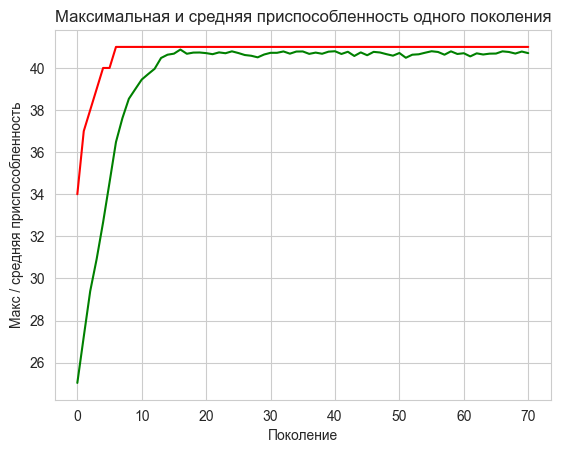

In [5]:
POPULATION_SIZE = 200
P_CROSSOVER = 0.8
P_MUTATION = 0.1
MAX_GENERATIONS = 70
HALL_OF_FAME_SIZE = 10

spells = SpellsPrepareProblem()

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

toolbox.register("zeroOrOne", random.randint, 0, 1)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))

creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(spells))

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation
def spellsValue(individual):
    return spells.getValue(individual),


toolbox.register("evaluate", spellsValue)

toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(spells))

def main():

    population = toolbox.populationCreator(n=POPULATION_SIZE)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    population, logbook = elitysm.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    best = hof.items[0]
    print("-- Лучший индивид = ", best)
    print("-- Лучшая приспособленность = ", best.fitness.values[0])

    print("-- Подготовленные заклинания = ")
    spells.printItems(best)

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Поколение')
    plt.ylabel('Макс / средняя приспособленность')
    plt.title('Максимальная и средняя приспособленность одного поколения')
    plt.show()


if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import numpy as np
import deap
import matplotlib.pyplot as plt
import seaborn as sns

class SpellsPrepareProblem:
    def __init__(self):
        self.spells = []
        self.maxSpellsCapacity = 0
        
        self.__init_data()
    
    def __len__(self):
        return len(self.spells)
    
    @staticmethod
    def check_element_bonus(element1, element2):
        if (element1 == "вода" and element2 == "Огонь"):
            return True
        elif (element1 == "огонь" and element2 == "Вода"):
            return True
        elif (element1 == "молния" and element2 == "Природа"):
            return True
        elif (element1 == "природа" and element2 == "Молния"):
            return True
        elif (element1 == "свет" and element2 == "Тьма"):
            return True
        elif (element1 == "тьма" and element2 == "Свет"):
            return True
    
    def __init_data(self):

    #Загрузка данных из Excel-файла, обработка и инициализация объекта.

   # Выполняет следующие действия:
       # 1. Загружает данные из файла "Spells.xls".
       # 2. Преобразует данные в DataFrame.
       # 3. Сохраняет информацию о заклинаниях в self.spells.
       # 4. Печатает доступные стихии.
       # 5. Запрашивает у пользователя среду боя и корректирует ценность заклинаний.
       # 6. Запрашивает у пользователя стиль игры и корректирует ценность заклинаний.
       # 7. Устанавливает максимальную вместимость заклинаний (self.maxSpellsCapacity).

        try:
            # 1. Загрузка данных из Excel-файла
            data = pd.read_excel("Spells.xls")

            # 2. Преобразование данных в DataFrame
            df = pd.DataFrame(data, columns=["Название", "Круг", "Стихия", "Тип", "Ценность заклинания"])

            # 3. Сохранение информации о заклинаниях
            for i in range(len(df)):
                self.spells.append(df.iloc[i])

            # 4. Печать доступных стихий
            print("Доступные стихии:")
            unique_df = df.loc[~df["Стихия"].duplicated()]
            print(unique_df["Стихия"].to_list())
            # 5. Запрос среды боя и корректировка ценности заклинаний
            cmd = input("Выберите стихию, в среде которой планируется боёвка: ").lower()
            for i in range(len(self.spells)):
                if self.check_element_bonus(cmd, self.spells[i]["Стихия"]):
                    self.spells[i]["Ценность заклинания"] += 1

            # 6. Запрос стиля игры и корректировка ценности заклинаний
            cmd = input("Выберите стиль игры: Атакующий, Поддерживающий, Сбалансированный ").lower()
            for i in range(len(self.spells)):
                if (cmd == "атакующий") and (self.spells[i]["Тип"] == "Атакующее"):
                    self.spells[i]["Ценность заклинания"] += 1
                elif (cmd == "поддерживающий") and (self.spells[i]["Тип"] == "Поддерживающее"):
                    self.spells[i]["Ценность заклинания"] += 1

            # 7. Установка максимальной вместимости заклинаний
            cmd = input("Введите доступное количество подготовленных заклинаний ").lower()
            self.maxSpellsCapacity = int(cmd)

        except FileNotFoundError:
            print("Файл Spells.xls не найден. Проверьте наличие файла.")


            
    def getValue(self, zeroOneList):
        totalWeight = totalValue = 0

        for i in range(min(len(zeroOneList), len(self.spells))):
            item, lvl, element, tipe, value_str = self.spells[i]
            value = int(value_str)

            weight = 1
            if totalWeight + weight <= self.maxSpellsCapacity:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value

        return totalValue

    
    def printItems(self, zeroOneList):
        
        totalWeight = totalValue = 0
        listOfItems = ''
        
        for i in range(len(zeroOneList)):
            item, lvl, element, tipe, value = self.spells[i]
            weight = 1
            
            if totalWeight + weight <= self.maxSpellsCapacity:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    listOfItems += item + ', '
                    print("Добавлено {}: круг {}, стихия {}, тип {}, ценность {}. Суммарный вес {}, суммарная ценность {}".format(item, lvl, element, tipe, value, totalWeight, totalValue))
        print ("Сборка завершена. Количество подготовленных заклинаний {}, общая ценность {}".format(totalWeight, totalValue))
        print ("Общий список рекомендуемых заклинаний: {}".format(listOfItems)) 
        
        

In [ ]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
                       halloffame=None, verbose=__debug__):

  '''
  Эта функция реализует простой генетический алгоритм с элитизмом.

  Args:
      population: Начальная популяция кандидатов (решений).
      toolbox: Набор инструментов, содержащий функции для оценки,
                скрещивания, мутации и отбора.
      cxpb: Вероятность кроссовера (скрещивания) между двумя особями.
      mutpb: Вероятность мутации отдельного гена особи.
      ngen: Число поколений, которые должен выполнить алгоритм.
      stats: (Необязательно) Объект статистики для сбора данных о
             популяции во время эволюции.
      halloffame: Зал славы для хранения лучших особей на протяжении
                 поколений.
      verbose: (Необязательно) Флаг для включения печати информации
               о ходе алгоритма.

  Returns:
      tuple: Кортеж, содержащий финальную популяцию и журнал
             (logbook) с информацией о процессе эволюции.
    '''
    
  # Журнал для записи информации о ходе алгоритма
  logbook = tools.Logbook()
  logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

  # Оценка особей с невалидным значением функции приспособленности
  invalid_ind = [ind for ind in population if not ind.fitness.valid]
  fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
  for ind, fit in zip(invalid_ind, fitnesses):
      ind.fitness.values = fit

  if halloffame is None:
      raise ValueError("Зал славы (halloffame) не может быть пустым!")

  # Добавление начальной популяции в зал славы
  halloffame.update(population)
  hof_size = len(halloffame.items) if halloffame.items else 0

  # Сбор статистики по начальной популяции (если stats задан)
  record = stats.compile(population) if stats else {}
  logbook.record(gen=0, nevals=len(invalid_ind), **record)
  if verbose:
      print(logbook.stream)

  # Цикл поколений
  for gen in range(1, ngen + 1):

      # Отбор особей для следующего поколения (исключая лучших из зала славы)
      offspring = toolbox.select(population, len(population) - hof_size)

      # Вариация пула особей (скрещивание и мутация)
      offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

      # Оценка особей с невалидным значением функции приспособленности
      invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
      for ind, fit in zip(invalid_ind, fitnesses):
          ind.fitness.values = fit

      # Добавление лучших особей из зала славы обратно в популяцию
      offspring.extend(halloffame.items)

      # Обновление зала славы новыми особями
      halloffame.update(offspring)

      # Замена текущей популяции на следующее поколение
      population[:] = offspring

      # Сбор статистики по новому поколению (если stats задан)
      record = stats.compile(population) if stats else {}
      logbook.record(gen=gen, nevals=len(invalid_ind), **record)
      if verbose:
          print(logbook.stream)

  return population, logbook